##  加载数据

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
df_train_trans=pd.read_csv('../input/transaction_TRAIN.csv') # (161965, 27)
df_train_op=pd.read_csv('../input/operation_TRAIN.csv') # (424481, 20)
df_train_tag=pd.read_csv('../input/tag_TRAIN.csv') # (13422, 2)

df_train_trans.rename(columns=lambda col:'trans_'+col if col!='UID' else col,inplace=True)
df_train_op.rename(columns=lambda col:'op_'+col if col!='UID' else col,inplace=True)

df_tag_uids=df_train_tag['UID'] # 标签中的UID都是唯一的
black_uids=df_train_tag[df_train_tag['Tag']==1]['UID']
white_uids=df_train_tag[df_train_tag['Tag']==0]['UID']

black_trans=df_train_trans[df_train_trans['UID'].isin(black_uids)]
white_trans=df_train_trans[df_train_trans['UID'].isin(white_uids)]

black_op=df_train_op[df_train_op['UID'].isin(black_uids)]
white_op=df_train_op[df_train_op['UID'].isin(white_uids)]

In [82]:
df_train_trans.head()

UID  trans_channel  trans_day trans_time  trans_trans_amt  \
0  19092            102         30   11:48:47             1459   
1  13465            140         23   16:58:03              725   
2  13713            140         22   09:56:39              127   
3  22703            140          1   18:11:45            99317   
4  17816            140         22   13:04:02             3361   

     trans_amt_src1    trans_merchant trans_code1 trans_code2  \
0  acdbdb842ac20f1e  abc6bc660561e0eb         NaN         NaN   
1  4d7831c6f695ab19  7a87b1aa20972d48         NaN         NaN   
2  c5fc631370cabc0d  cfd035fc7e0a53b2         NaN         NaN   
3  a571c7fda8b7df37  c71c876b8979028e         NaN         NaN   
4  c5fc631370cabc0d  6628f5ca013e3582         NaN         NaN   

  trans_trans_type1        ...                trans_ip1 trans_bal  \
0  26bcf43a19df14c8        ...         a664530c1fb20abe      1007   
1  c2f2023d279665b2        ...         52abe1e300a8aa10       100   
2  c2f2023d279665b2        ...         e4c132d02ff6c095       100   
3  c2f2023d279665b2        ...         e1c78a56cc9dfc8b       100   
4  c2f2023d279665b2        ...         abb6b4b8f15be6d6       100   

     trans_amt_src2 trans_acc_id2 trans_acc_id3 trans_geo_code  \
0  9fefed0a981dcb7a           NaN           NaN           wsbq   
1               NaN           NaN           NaN           wte7   
2               NaN           NaN           NaN           ws7n   
3  fbf6bf3c8927414c           NaN           NaN           wqj6   
4               NaN           NaN           NaN            NaN   

  trans_trans_type2 trans_market_code  trans_market_type     trans_ip1_sub  
0             102.0  2ecf94369847c748                1.0  45f4ca1f4e9b9cb7  
1             105.0               NaN                NaN  2b416f1d7e89ad3b  
2             105.0               NaN                NaN  ff71a556d86c4b8f  
3               NaN               NaN                NaN  cf1527a0b4173e8f  
4             105.0               NaN                NaN  cbc62c2b1cb7deb9  

[5 rows x 27 columns]

In [83]:
df_train_op.head()

UID  op_day           op_mode  op_success   op_time  op_os op_version  \
0  10035      30  c8741ce15ceac2a4         1.0  17:51:50    102      7.0.9   
1  16264      16  20a91b45ef8f8221         1.0  08:36:00    200        NaN   
2  13162       8  b668e42707ee9c7b         0.0  18:09:57    102      7.0.5   
3  21392      23  c8741ce15ceac2a4         1.0  23:53:49    102      7.0.9   
4  18599      26  acfaded7e04e7ba0         1.0  11:11:15    102      7.0.0   

         op_device1 op_device2   op_device_code1   op_device_code2  \
0  49dd36968dbfadda   OPPO R11  ecb58082e0e9b8e2  00fa2e4ba95605ef   
1               NaN        NaN               NaN               NaN   
2  630a1adff2a87007   MI MAX 2  1da225cb679a37eb  f18538156b8f9b57   
3  630a1adff2a87007      MI 5X  d0c285513b785609  a7e79e3c2c85c8c7   
4  8399be6b80847240        NaN  27efd832595503f6  b6457e2264266257   

  op_device_code3           op_mac1           op_mac2            op_ip1  \
0             NaN               NaN  a8dc52f65085212e  55dd8936655c86f6   
1             NaN               NaN               NaN               NaN   
2             NaN  a8dc52f65085212e               NaN  2147d925e7a8ba3c   
3             NaN               NaN  04a2d6c090518faa  c52efc665f0af581   
4             NaN               NaN  1ab9dc3eae102aa6  0fe293bea342665a   

             op_ip2           op_wifi op_geo_code        op_ip1_sub  \
0               NaN               NaN        wskx  e58e48fb9215116e   
1  fc7fc47d6c93f554               NaN         NaN               NaN   
2               NaN               NaN         NaN  3591678eca3f7a23   
3               NaN  4ff1553b1c96360e        wm4v  fdb5e20f6a6f2cd7   
4               NaN               NaN         NaN  f5009e2c6c13c80c   

         op_ip2_sub  
0               NaN  
1  3502c553ea2ac187  
2               NaN  
3               NaN  
4               NaN

## 交易时间

- 小时划分

看看黑用户是否熬夜，是否深夜偷摸的做事情

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


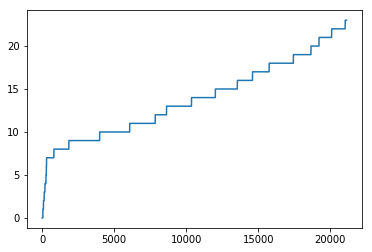

In [84]:
black_trans['trans_time']=pd.to_datetime(black_trans['trans_time']).dt.hour
plt.plot(black_trans['trans_time'].sort_values().values)
plt.show()

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(*args, **kw)>

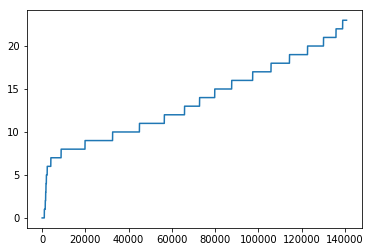

In [85]:
white_trans['trans_time']=pd.to_datetime(white_trans['trans_time']).dt.hour
plt.plot(white_trans['trans_time'].sort_values().values)
plt.show()

我们看了下，白用户和黑用户的交易时间都是分布比较分散的，没有太大的区别性